In [73]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import os
from networkx.algorithms import bipartite

**BEGIN PART A**

In [74]:
data_dir = "letter_edgelist.tsv"

In [75]:
tudor_df = pd.read_csv(data_dir, sep='\t') 
tudor_df

,#SENDER_ID,RECIPIENT_ID,DATE_FROM,DATE_TO,MS_ID,PLACE_ID,MS_REF
0,10102,18633,0,0,SP_84/63_f.49,0,SP 84/63 f.49
1,10407,24658,0,0,spo2_imcc-v003-p000_imcc-v003-p000-m0234-cm,3481,SP 63/25 f.55
2,10575,28163,0,0,Harley_7002_f.241,0,Harley 7002 f.241
3,10903,20638,0,0,Harley_7002_f.75,0,Harley 7002 f.75
4,10955,31585,0,0,SP_84/63_f.12,0,SP 84/63 f.12
...,...,...,...,...,...,...,...
139292,15618,29809,16030723,16030723,spo1_MQIS_SAL-v015-p015_mqes_sal-v015-p015-m04...,0,NaN
139293,20170,29809,16030723,16030723,spo1_MQIS_SAL-v015-p015_mqes_sal-v015-p015-m04...,4019,NaN
139294,11449,29809,16030724,16030724,spo1_MQIS_SAL-v015-p015_mqes_sal-v015-p015-m04...,0,NaN
139295,17019,7068,16030724,16030724,spo1_ELZ1-fd1580-td1625_elz1-fd1580-td1625-m13...,0,SP 15/35


In [76]:
raw_data_agg = tudor_df.groupby(['#SENDER_ID', 'RECIPIENT_ID']).size().reset_index(name='weight')
raw_data_agg

,#SENDER_ID,RECIPIENT_ID,weight
0,7,32642,1
1,9,33559,1
2,10,30478,1
3,12,28530,1
4,13,24566,1
...,...,...,...
40110,38196,30478,1
40111,38197,24658,1
40112,38198,19699,1
40113,38199,12113,1


In [77]:
raw_data_agg.sort_values(by='weight', ascending=False)

,#SENDER_ID,RECIPIENT_ID,weight
32382,30517,30478,563
25848,26415,30478,449
28988,28892,30478,442
7050,8067,28530,421
32287,30507,30478,390
...,...,...,...
15851,15617,32545,1
15850,15616,24566,1
15848,15615,13349,1
15846,15614,35838,1


In [78]:
tudor_net = nx.from_pandas_edgelist(df = raw_data_agg, source='#SENDER_ID', target='RECIPIENT_ID', edge_attr=True)

In [79]:
tudor_net_directed = nx.from_pandas_edgelist(df = raw_data_agg, 
                                             source='#SENDER_ID', 
                                             target='RECIPIENT_ID',
                                             create_using = nx.DiGraph(),
                                             edge_attr=True)

In [80]:
# Create a dataset with only one row for each node (rather than one row for each node/node pair)
# Calculate the number of emails sent to that node by any other node
# And the number of emails sent from that node to any other node

tudor_degree_df = pd.DataFrame({'id' : tudor_net_directed.nodes(),
             'in_degree' : [y for (x,y) in tudor_net_directed.in_degree()],
             'out_degree' : [y for (x,y) in tudor_net_directed.out_degree()]
             })

tudor_degree_df

,id,in_degree,out_degree
0,7,0,1
1,32642,141,25
2,9,0,1
3,33559,4,1
4,10,0,1
...,...,...,...
20555,38197,0,1
20556,38198,0,1
20557,38199,0,1
20558,40000,0,1


In [81]:
# Calculate the average in-degree
av_in_degree = np.average(tudor_degree_df['in_degree'])
av_in_degree

1.9511186770428015

In [82]:
# Calculate the average out-degree
av_out_degree = np.average(tudor_degree_df['out_degree'])
av_out_degree

1.9511186770428015

In [83]:
# Uncomment and run the following cell if you get the warning "divide by zero encountered in log"
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

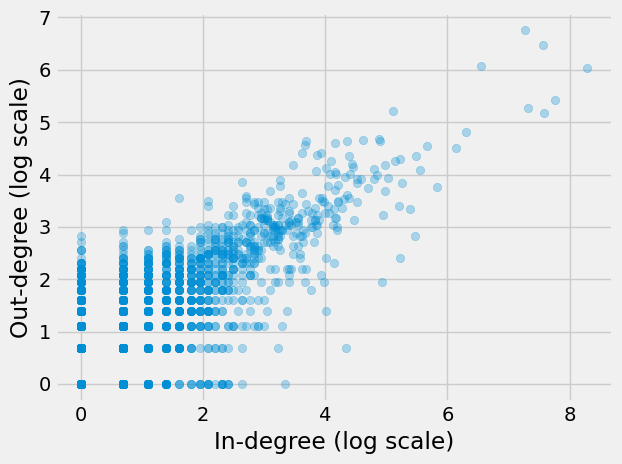

In [84]:
plt.scatter(np.log(tudor_degree_df['in_degree']),
            np.log(tudor_degree_df['out_degree']),
            alpha = 0.3)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel("In-degree (log scale)")
plt.ylabel("Out-degree (log scale)")
plt.show()

**END PART A**

**BEGIN PART B**

In [85]:
nx.number_connected_components(tudor_net)

942

In [86]:
cur_network = tudor_net

In [87]:
def get_degree_list(g):
    return([deg_val for (node, deg_val) in g.degree()])

In [88]:
def plot_degree_list(deg_list, **kwargs):
    Table().with_column('degree', deg_list).hist(**kwargs)

In [89]:
def compare_degree_lists(name1, deg_list1, name2, deg_list2, **kwargs):
    Table().with_column(name1, deg_list1).with_column(name2, deg_list2).hist(**kwargs)

In [90]:
cur_network_degrees = get_degree_list(cur_network)
#cur_network_degrees

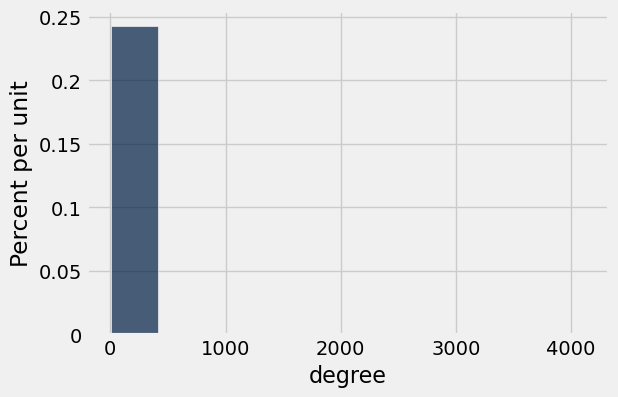

In [91]:
plot_degree_list(cur_network_degrees)

In [92]:
avg_degree = np.mean(cur_network_degrees)
avg_degree

3.5687743190661481

In [93]:
num_nodes = cur_network.number_of_nodes()
num_nodes

20560

This suggests that a 'matching' ER network would have parameters

* $n = 20560$ 
* $\bar{d} = 3.5687743190661481 \Longleftrightarrow p = 3.5687743190661481/20560 = 0.00017357851$

In [94]:
config_model_graph = nx.configuration_model(cur_network_degrees)

In [95]:
config_model_graph.number_of_nodes()

20560

In [96]:
config_model_degree_list = get_degree_list(config_model_graph)
cur_network_degrees == config_model_degree_list

True

In [97]:
config_model_graph

In [98]:
# get rid of self-loops and multiple edges
simple_config_model_graph = nx.Graph(config_model_graph)
simple_config_model_graph.remove_edges_from(nx.selfloop_edges(simple_config_model_graph))

In [99]:
simple_config_model_degree_list = get_degree_list(simple_config_model_graph)
cur_network_degrees == simple_config_model_degree_list

False

In [100]:
#compare_degree_lists('observed', cur_network_degrees, 'config model simplified', simple_config_model_degree_list)

In [101]:
#cc_in_tudor = nx.average_clustering(cur_network)

In [102]:
#nx.average_clustering(simple_config_model_graph)

In [103]:
#assort_in_tudor = nx.degree_assortativity_coefficient(cur_network)

In [104]:
#nx.degree_assortativity_coefficient(simple_config_model_graph)

In [105]:
#cc_res = make_array()
#assort_res = make_array()

#for i in range(100):
#    cur_rand_config_model_graph = nx.configuration_model(cur_network_degrees)
#    # simplify the graph by removing multi-edges and self loops
#    cur_rand_config_model_graph = nx.Graph(cur_rand_config_model_graph)
#    cur_rand_config_model_graph.remove_edges_from(nx.selfloop_edges(cur_rand_config_model_graph))
#    cc_res = np.append(cc_res, nx.average_clustering(cur_rand_config_model_graph))
#    assort_res = np.append(assort_res, nx.degree_assortativity_coefficient(cur_rand_config_model_graph))
    
#Table().with_column('config model CC', cc_res).hist()

In [106]:
#cc_table = Table().with_column('config model CC', cc_res)
#cc_table.hist()

In [107]:
#print(min(cc_table.column(0)))
#print(np.percentile(cc_table.column(0), 25))
#print(np.percentile(cc_table.column(0), 50))
#print(np.percentile(cc_table.column(0), 75))
#print(max(cc_table.column(0)))

In [108]:
#cc_in_tudor

In [109]:
#np.count_nonzero(cc_table.column(0) >= cc_in_tudor) / len(cc_table.column(0))

In [110]:
#assort_table = Table().with_column('config model assortativity', assort_res)
#assort_table.hist()

In [111]:
#print(np.mean(assort_table.column(0)))
#print(min(assort_table.column(0)))
#print(max(assort_table.column(0)))

In [112]:
#assort_in_tudor

In [113]:
#np.count_nonzero(assort_table.column(0) <= assort_in_tudor) / len(assort_table.column(0))

**END PART B**

**BEGIN PART C (EXTRA CREDIT)**

In [114]:
ec_dir = "people_labels.tsv"

In [143]:
ec_df = pd.read_csv(ec_dir, sep='\t') 
ec_df

,3,(Monseigneur)
0,7,--- Parker the elder
1,9,--- Thomas
2,10,--- Topcliffe
3,12,...
4,13,11 others
...,...,...
20554,38197,"Robert Stewart, 1st Earl of March"
20555,38198,John Porterfield
20556,38199,Margaret of Savoy's Council
20557,38200,Thomas Sherley


In [116]:
ec_table = Table().from_df(ec_df)
ec_table_relabeled = ec_table.relabel('3', 'id').relabel('(Monseigneur)', 'label')
ec_table_relabeled

id,label
7,--- Parker the elder
9,--- Thomas
10,--- Topcliffe
12,...
13,11 others
15,A Blakcadell
16,A Captain of Bouchain
17,A Catholic in Brussels
19,A Councillor of France
22,A Frenchman of St. Martin's


In [144]:
raw_data_table = Table().from_df(raw_data_agg)
raw_data_trimmed = raw_data_table.select('#SENDER_ID', 'RECIPIENT_ID')
raw_data_trimmed

#SENDER_ID,RECIPIENT_ID
7,32642
9,33559
10,30478
12,28530
13,24566
15,29809
16,24470
17,12255
22,30478
25,24566


In [145]:
raw_data_in_degree = raw_data_trimmed.select('RECIPIENT_ID')
raw_data_in_degree

RECIPIENT_ID
32642
33559
30478
28530
24566
29809
24470
12255
30478
24566


In [146]:
raw_data_in_degree_grouped = raw_data_in_degree.group('RECIPIENT_ID').sort('count', descending=True)
raw_data_in_degree_grouped

RECIPIENT_ID,count
30478,3983
29809,2330
32545,1960
24566,1926
28530,1516
24658,1437
11844,704
3674,548
26529,462
1683,340


In [147]:
final_joined_in_degree = raw_data_in_degree_grouped.join('RECIPIENT_ID', ec_table_relabeled, 'id')
final_joined_in_degree.sort('count', descending = True)

RECIPIENT_ID,count,label
30478,3983,"Sir William Cecil, Lord Burghley"
29809,2330,"Sir Robert Cecil, Earl of Salisbury"
32545,1960,"Thomas Cromwell, Earl of Essex"
24566,1926,Privy Council
28530,1516,Sir Francis Walsingham
24658,1437,Queen Elizabeth I
11844,704,Henry VIII
3674,548,Cardinal Thomas Wolsey
26529,462,"Robert Devereux, Earl of Essex"
1683,340,"Arthur Plantagenet, Lord Lisle"


In [148]:
final_joined_in_degree.where('label', 'Henry VIII').column('count')[0]

704

In [149]:
print('Henry, Katharine, Thomas, Emery, Desiderius')
# Henry VIII
print(final_joined_in_degree.where('label', 'Henry VIII').column('count')[0])
# Katharine of Arragon
print(final_joined_in_degree.where('label', 'Katharine of Arragon').column('count')[0])
# Thomas Cromwell, Earl of Essex
print(final_joined_in_degree.where('label', 'Thomas Cromwell, Earl of Essex').column('count')[0])
# Emery Molyneux
print(final_joined_in_degree.where('label', 'Emery Molyneux').column('count'))
# Desiderius Erasmus
print(final_joined_in_degree.where('label', 'Desiderius Erasmus').column('count')[0])

Henry, Katharine, Thomas, Emery, Desiderius
704
22
1960
[]
39


In [150]:
raw_data_out_degree = raw_data_trimmed.select('#SENDER_ID')
raw_data_out_degree

#SENDER_ID
7
9
10
12
13
15
16
17
22
25


In [151]:
raw_data_out_degree_grouped = raw_data_out_degree.group('#SENDER_ID').sort('count', descending=True)
raw_data_out_degree_grouped

#SENDER_ID,count
24658,856
24566,645
11844,430
30478,420
29809,227
28530,196
24679,185
32545,177
3674,124
12113,107


In [152]:
final_joined_out_degree = raw_data_out_degree_grouped.join('#SENDER_ID', ec_table_relabeled, 'id')
final_joined_out_degree.sort('count', descending=True)

#SENDER_ID,count,label
24658,856,Queen Elizabeth I
24566,645,Privy Council
11844,430,Henry VIII
30478,420,"Sir William Cecil, Lord Burghley"
29809,227,"Sir Robert Cecil, Earl of Salisbury"
28530,196,Sir Francis Walsingham
24679,185,Queen Mary I
32545,177,"Thomas Cromwell, Earl of Essex"
3674,124,Cardinal Thomas Wolsey
12113,107,"Holy Roman Emperor Charles V, (King Charles I of Spain)"


In [153]:
final_joined_out_degree.where('label', 'Henry VIII').column('count')[0]

430

In [154]:
print('Henry, Katharine, Thomas, Emery, Desiderius')
print(final_joined_out_degree.where('label', 'Henry VIII').column('count')[0])
print(final_joined_out_degree.where('label', 'Katharine of Arragon').column('count')[0])
print(final_joined_out_degree.where('label', 'Thomas Cromwell, Earl of Essex').column('count')[0])
print(final_joined_out_degree.where('label', 'Emery Molyneux').column('count')[0])
print(final_joined_out_degree.where('label', 'Desiderius Erasmus').column('count')[0])

Henry, Katharine, Thomas, Emery, Desiderius
430
22
177
2
96


In [128]:
print('Henry, Katharine, Thomas, Emery, Desiderius')
# Henry VIII
print(final_joined_out_degree.where('label', 'Henry VIII').column('count')[0])
# Katharine of Arragon
print(final_joined_out_degree.where('label', 'Katharine of Arragon').column('count')[0])
# Thomas Cromwell, Earl of Essex
print(final_joined_out_degree.where('label', 'Thomas Cromwell, Earl of Essex').column('count')[0])
# Emery Molyneux
print(final_joined_out_degree.where('label', 'Emery Molyneux').column('count')[0])
# Desiderius Erasmus
print(final_joined_out_degree.where('label', 'Desiderius Erasmus').column('count')[0])

Henry, Katharine, Thomas, Emery, Desiderius
1505
53
402
2
293


In [129]:
def create_edge_list(df, input_col, output_col):
    """Creates an edge list from input and output columns in a DataFrame."""
    return df[[input_col, output_col]].values.tolist()

# Example usage:
edge_list = create_edge_list(tudor_df, '#SENDER_ID', 'RECIPIENT_ID')
#print(edge_list)

In [130]:
G = nx.Graph(edge_list)

In [131]:
nx.clustering(G, 11844)

0.006184422848047197

In [132]:
nx.clustering(G, 16721)

0.10661268556005399

In [133]:
nx.clustering(G, 32545)

0.0011841127076401838

In [134]:
nx.clustering(G, 8417)

1.0

In [135]:
nx.clustering(G, 6113)

0.02503967554223241

In [136]:
eigen_cent = nx.eigenvector_centrality(G)

In [137]:
eigen_cent.get(11844)

0.04153751662262397

In [138]:
eigen_cent.get(16721)

0.0026266482807409987

In [139]:
eigen_cent.get(32545)

0.050180677994212775

In [140]:
eigen_cent.get(8417)

0.00900057048223011

In [141]:
eigen_cent.get(6113)

0.003254850080722831